In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import pandas as pd

import numpy.random as npr

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
%matplotlib inline

In [2]:
dir       = 'data/'
file_name = 'grid1_zheb51fo.xlsx'
UX1       = pd.read_excel(dir+file_name, sheet_name='UX1_Index')
UX2       = pd.read_excel(dir+file_name, sheet_name='UX2_Index')
UX1

,Date,PX_LAST,PX_VOLUME
0,2022-01-18,21.7800,5655
1,2022-01-17,NaN,0
2,2022-01-14,21.7462,102849
3,2022-01-13,22.0944,82700
4,2022-01-12,20.9713,76675
...,...,...,...
3029,2010-01-08,22.5500,2050
3030,2010-01-07,23.1500,1760
3031,2010-01-06,23.5500,1958
3032,2010-01-05,24.4500,1936


Historical data of SPX price found at https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

In [86]:
file_name = 'SPX_HistoricalData.csv'
SPX_price = pd.read_csv(dir+file_name)
SPX_price['Date']                             = pd.to_datetime(SPX_price['Date'],format='%m/%d/%y')
SPX_price                                     = SPX_price.set_index('Date')
SPX_price.sort_index(inplace=True)
SPX_price

,Open,High,Low,Close
Date,,,,
2010-04-01,1171.23,1181.43,1170.69,1178.10
2010-04-05,1178.71,1187.73,1178.71,1187.44
2010-04-06,1186.01,1191.80,1182.77,1189.44
2010-04-07,1188.23,1189.60,1177.25,1182.45
2010-04-08,1181.75,1188.55,1175.12,1186.44
...,...,...,...,...
2022-01-10,4655.34,4673.02,4582.24,4670.29
2022-01-11,4669.14,4714.13,4638.27,4713.07
2022-01-12,4728.59,4748.83,4706.71,4726.35


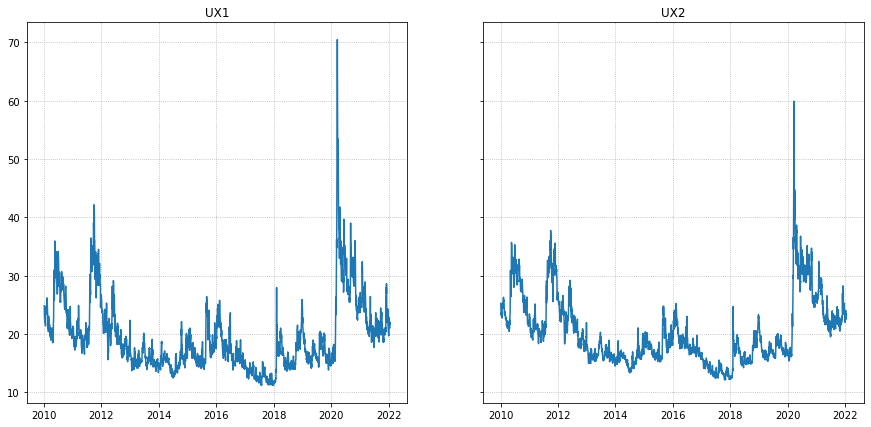

In [87]:
fig,ax = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
ax[0].plot(UX1.Date, UX1.PX_LAST)
ax[1].plot(UX2.Date, UX2.PX_LAST)
ax[0].set_title('UX1')
ax[1].set_title('UX2')
ax[0].grid(linestyle='dotted')
ax[1].grid(linestyle='dotted')
plt.show()

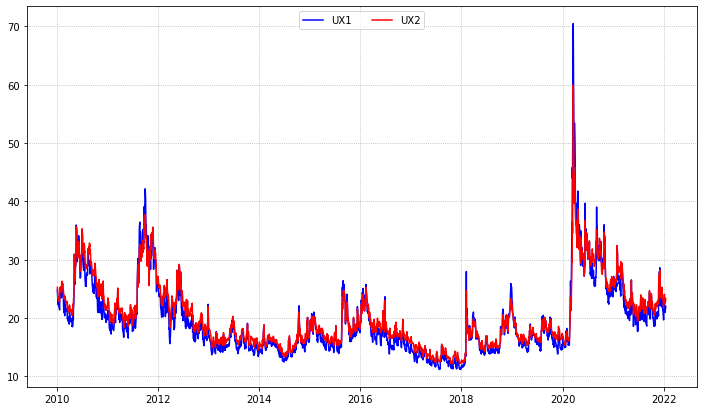

In [88]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(UX1.Date, UX1.PX_LAST, label='UX1', color='blue')
ax.plot(UX2.Date, UX2.PX_LAST, label='UX2', color='red')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
plt.show()

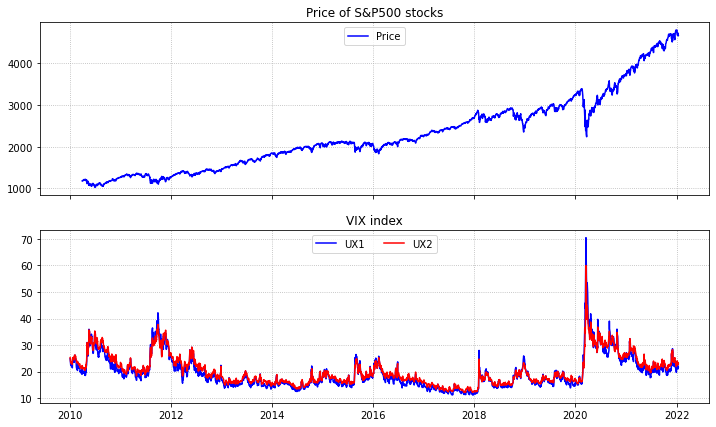

In [89]:
fig,ax = plt.subplots(nrows=2,figsize=(12,7), sharex=True)
ax[0].plot(SPX_price.index, SPX_price.Close, label='Price', color='blue')
ax[0].legend(loc='upper center', ncol=2)
ax[0].grid(linestyle='dotted')
ax[0].set_title('Price of S&P500 stocks')

ax[1].plot(UX1.Date, UX1.PX_LAST, label='UX1', color='blue')
ax[1].plot(UX2.Date, UX2.PX_LAST, label='UX2', color='red')
ax[1].legend(loc='upper center', ncol=2)
ax[1].grid(linestyle='dotted')
ax[1].set_title('VIX index')
plt.show()

In [90]:
SPX_price['LogReturn'] = np.log(SPX_price['Close']/SPX_price['Close'].shift(1))

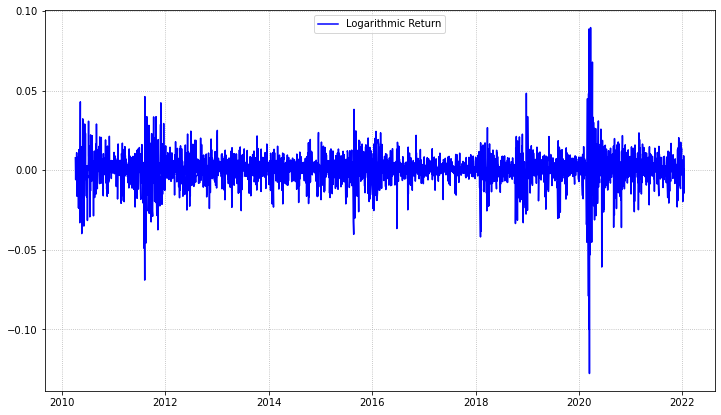

In [91]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(SPX_price.index, SPX_price.LogReturn, label='Logarithmic Return', color='blue')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
#ax.set_title('Price of S&P500 stocks')
plt.show()

Expected return:		0.1252
Volatility:     		0.0154


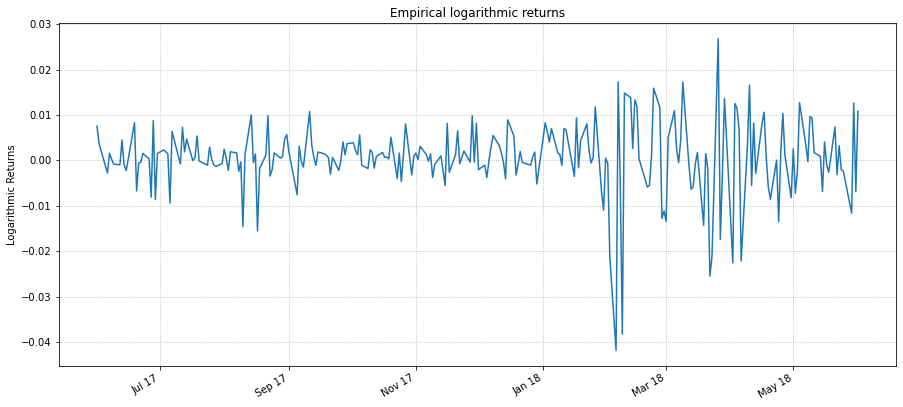

In [133]:
dt               = 1/252
start            = '2017-06-01'
stop             = '2018-06-01'
mask             = (SPX_price.index >= start) & (SPX_price.index <= stop)
SPX_price_window = SPX_price[mask]
Expected_Return  = (2*SPX_price_window['LogReturn'].mean() + 2*SPX_price_window['LogReturn'].var()*dt) / (2*dt)
Volatility       = SPX_price_window['LogReturn'].var()/dt

print('Expected return:\t\t%.4f'% Expected_Return)
print('Volatility:     \t\t%.4f'% Volatility)

fig, ax          = plt.subplots(figsize=(15,7))
SPX_price_window['LogReturn'].plot(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Logarithmic Returns')
ax.set_title('Empirical logarithmic returns')
ax.grid(linestyle='dotted')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
plt.show()

In [144]:
n  = 4 # number of simulated paths
z  = np.sqrt(dt) * npr.normal(0,1,(n, SPX_price_window.shape[0])) # stochastic variable
S0 = SPX_price_window.loc[start,'Close']

for k in range(n):
    col = 'Price_Sim'+str(k)
    xt = np.array([0])
    for i in range(SPX_price_window.shape[0]-1):
        xt = np.append(xt, xt[i] + (Expected_Return - Volatility**2/2)*dt + Volatility*(z[k][i+1]+z[k][i]))

    SPX_price_window[col] = np.exp(xt)*S0

/tmp/ipykernel_124294/1766640872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPX_price_window[col] = np.exp(xt)*S0


Text(0.5, 1.0, 'Price of S&P500 stocks')

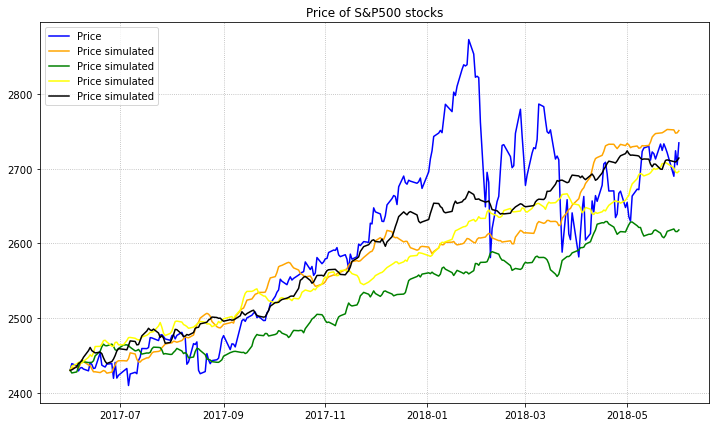

In [145]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(SPX_price_window.index, SPX_price_window.Close, label='Price', color='blue')
ax.plot(SPX_price_window.index, SPX_price_window.Price_Sim0, label='Price simulated', color='orange')
ax.plot(SPX_price_window.index, SPX_price_window.Price_Sim1, label='Price simulated', color='green')
ax.plot(SPX_price_window.index, SPX_price_window.Price_Sim2, label='Price simulated', color='yellow')
ax.plot(SPX_price_window.index, SPX_price_window.Price_Sim3, label='Price simulated', color='black')
ax.legend(loc='upper left')
ax.grid(linestyle='dotted')
ax.set_title('Price of S&P500 stocks')